<a href="https://colab.research.google.com/github/Nyfeu/ComputerVision/blob/main/PyTesseract_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o ambiente



O primeiro passo para nossos projetos de visão computacional em Python é a instalação das dependências necessárias.

No caso, visaremos três:
- **NumPy** - é uma biblioteca numérica disponível para Python.
- **OpenCV** - biblioteca destinada à visão compuutacional em tempo real.
- **PyTesseract** - interface para Python da biblioteca Tesseract OCR.

In [ ]:
!pip install opencv-python==4.8.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

O passo seguinte é a importação das dependências. O google.colab.patches é utilizado por uma questão de compatibilidade com o Google Colab.

In [4]:
import pytesseract
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

O material utilizado na aula está num repositório remoto no GitHub. Para que possamos usá-lo, basta clonar esse repositório:

In [5]:
! git clone https://github.com/sthemonica/text-recognize

Cloning into 'text-recognize'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 148 (delta 3), reused 1 (delta 1), pack-reused 144
Receiving objects: 100% (148/148), 37.21 MiB | 31.20 MiB/s, done.
Resolving deltas: 100% (35/35), done.


Checando se as versões instaladas e importadas em nosso ambiente de desenvolvimento estão de acordo com o esperado.

In [6]:
pytesseract.__version__

'0.3.9'

In [7]:
cv2.__version__

'4.8.0'

# Case 01 - Imagem em preto e branco


O primeiro passo é importar a imagem "teste.png" (que será utilizada), através da biblioteca OpenCV - utilizando o método ```imread()```. A função ```cv2_imshow```, por sua vez, é responsável por exibir a imagem passada como argumento.

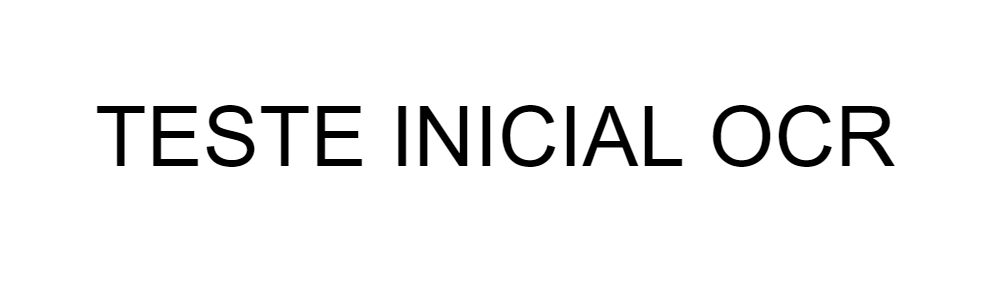

In [8]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-teste.png')
cv2_imshow(img)

Uma vez lida a imagem em questão, podemos utilizar o PyTesseract para ler o texto (string) contido nela - através do método ```pytesseract.image_to_string()```. Em seguida, pode-se verificar a validade do texto obtido.

In [9]:
text = pytesseract.image_to_string(img)
print(text)

TESTE INICIAL OCR



# Case 02 - Imagens coloridas

Importando e exibindo a imagem a ser trabalhada.

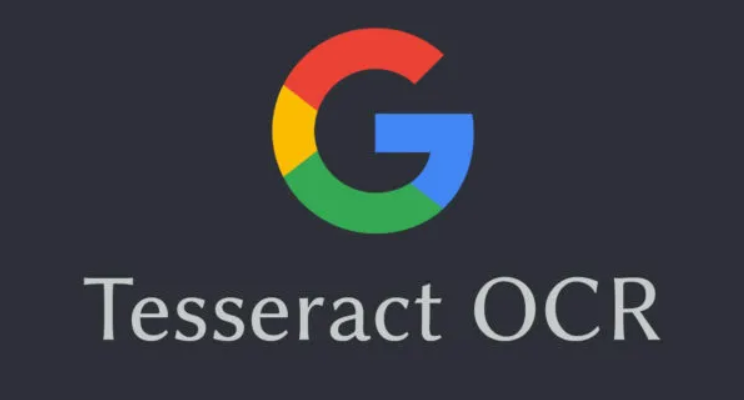

In [10]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-ocr.png')
cv2_imshow(img)

O OpenCV tem seus canais de cores invertidos, então, para utilizarmos com outras bibliotecas, precisamos fazer a conversão de BGR para RGB. Para isso, o método ```cvtColor()``` será utilizado para a conversão. O atributo ```cv2.COLOR_BGR2RGB``` é responsável por denotar a conversão de BGR para RGB.

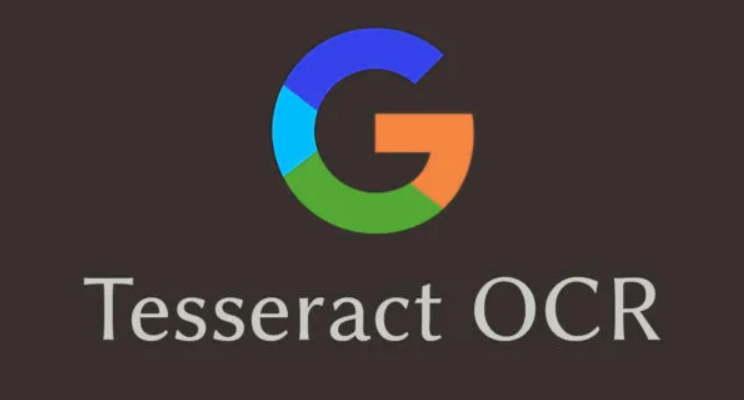

In [11]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [12]:
text = pytesseract.image_to_string(rgb)
print(text)

c

Tesseract OCR



Podemos também converter nossa imagem para tons de cinza, utilizando o atributo ```cv2.COLOR_BGR2GRAY```. No entanto, é importante reparar que alguns detalhes são perdidos - como o caso da distinção entre as seções coloridas da logo do Google.

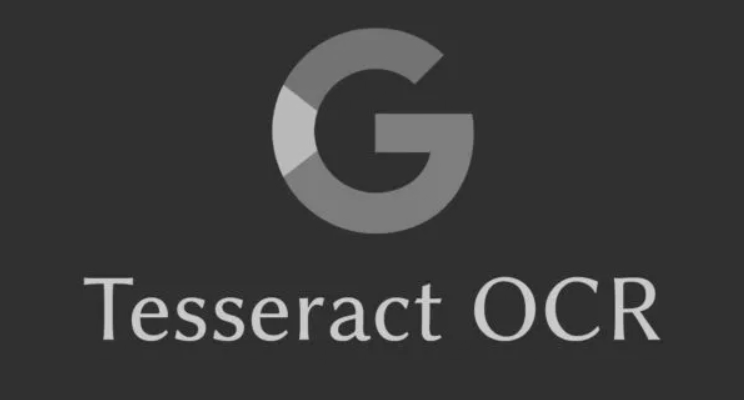

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [14]:
text = pytesseract.image_to_string(gray)
print(text)

C

Tesseract OCR



Este é um processo de **pré-processamento** da imagem. Pode-se reparar que, mesmo assim, a letra G ainda não é reconhecida apropriadamente - apesar de ter passado de ```c``` para ```C```.

Outra opção intererssante é converter as cores para obtenção de um sinal UV. Esse sinal era utilizado em televisões analógicass para colorir as saídas que anteriormente eram preto e branco - como no [link](https://en.wikipedia.org/wiki/Y%E2%80%B2UV). Para isso, basta utilizar o argumento: ```cv2.BGR2YUV```.

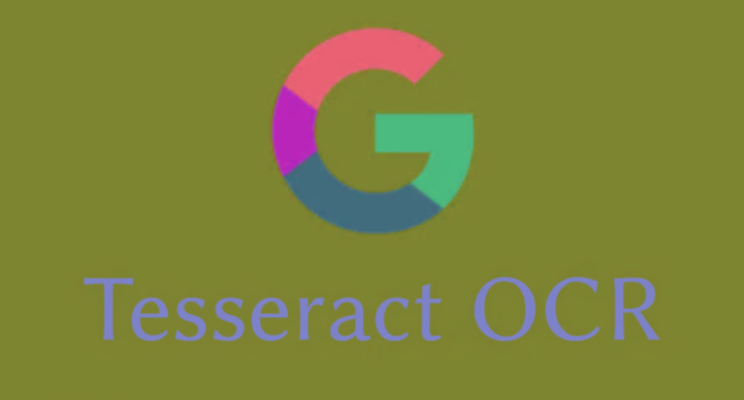

In [15]:
yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
cv2_imshow(yuv)

# Case 03 - Caracteres diferentes

Importando e exibindo a imagem a ser trabalhada:

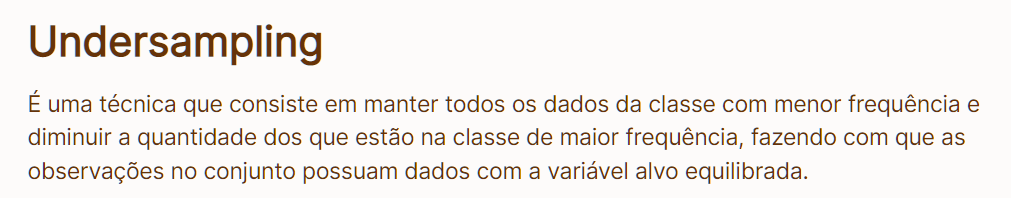

In [16]:
img = cv2.imread('/content/text-recognize/Imagens/Aula2-undersampling.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

Agora, se tentarmos extrair o texto da imagem:

In [17]:
text = pytesseract.image_to_string(rgb)
print(text)

Undersampling

E uma técnica que consiste em manter todos os dados da classe com menor frequéncia e
diminuir a quantidade dos que estdo na classe de maior frequéncia, fazendo com que as
observagées no conjunto possuam dados com a variavel alvo equilibrada.



Podemos verificar que a ortografia da língua portuguesa não foi reconhecida de forma correta. Podemos verificar a lista de linguagens que são reconhecidas pelo Tesseract em nosso ambiente:

In [18]:
!tesseract --list-langs

List of available languages (2):
eng
osd


Repare que a língua portuguesa não está inclusa nessa lista. Por conta disso, deveremos instalá-la.

In [19]:
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-por
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 856 kB of archives.
After this operation, 1,998 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-por all 1:4.00~git30-7274cfa-1.1 [856 kB]
Fetched 856 kB in 0s (2,413 kB/s)
Selecting previously unselected package tesseract-ocr-por.
(Reading database ... 121794 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-por_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...


In [20]:
!tesseract --list-langs

List of available languages (3):
eng
osd
por


Agora que a língua portuguesa para o Tesseract foi instalada corretamente - denotada por ```por``` - podemos especificar para o PyTesseract a linguagem desejada.

In [21]:
text = pytesseract.image_to_string(rgb, lang='por')
print(text)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



Dessa forma, o texto da imagem foi extraído de maneira correta. Sem erros de acentuação e reconhecendo os caracteres de forma precisa.

Para que não seja necessária a instalação da linguagem. Podemos incluir essas dependências no próprio projeto. Para isso, vamos criar o diretório ```tessdata``` e importar as linguagens a partir do GitHub.

In [22]:
!mkdir tessdata

In [23]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2024-02-09 16:31:36--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2024-02-09 16:31:36--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2024-02-09 16:31:36--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

Para verificar as linguagens incluídas:

In [24]:
!ls tessdata/

eng.traineddata  por.traineddata


Agora, precisamos definir as configurações do Tesseract. Para tal:

In [25]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



Para ter certeza, podemos remover o pacote de linguagem que instalamos anteriormente em nosso ambiente.

In [26]:
!apt remove tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages will be REMOVED:
  tesseract-ocr-por
0 upgraded, 0 newly installed, 1 to remove and 32 not upgraded.
After this operation, 1,998 kB disk space will be freed.
(Reading database ... 121798 files and directories currently installed.)
Removing tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...


In [27]:
!tesseract --list-langs

List of available languages (2):
eng
osd


Rodando o mesmo comando que rodamos anteriormente - utilizando a configuração que define as linguagens - obteremos o mesmo resultado.

In [28]:
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



# Case 04 - Page Segmentation Modes (PSMs)

Os modos de segmentação de página, mais conhecidos como PSMs, são extremamente importantes para melhorar a precisão usando OCR - principalmente quando temos imagens mais complexas.

Quando o PSM é identificado de maneira equivocada, tem-se dois possíveis retornos:
- Resultado vazio - não reconhece nenhum texto na imagem.
- Resultado com caracteres sem sentido.

Vamos brincar um pouco com esse conceito agora. O primeiro passo é importar a imagem a ser reconhecida.

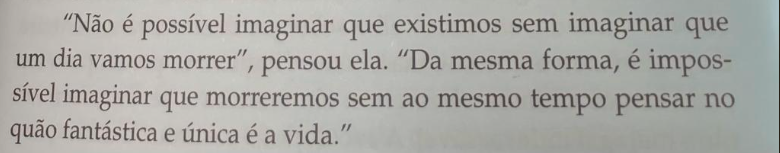

In [29]:
img = cv2.imread('/content/text-recognize/Imagens/Aula2-trecho-livro.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

Aplicando as configurações que já abordamos, podemos verificar que o texto é lido de forma correta.

In [30]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



Mas, que PSM foi identificado? Primeiramente, podemos verificar a lista de todos os PSMs possíveis. Com uma abordagem superficial é simples identificar que se trata do PSM 6 - que assume um bloco de texto uniforme.

In [31]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


Agora, especificando nas configurações o PSM 6, obteremos o resultado correto, da mesma forma que anteriormente. Assim, verifica-se que, de fato, trata-se do PSM 6.

In [32]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



No entanto, se trocarmos para o PSM 7, não obteremos resultado.

In [33]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

No caso do PSM 8, é retornada uma sequência de caracteres sem nenhum sentido.

In [34]:
config_tesseract = '--tessdata-dir tessdata --psm 8'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

ªfâ%êããããââª%%?ªííÉ:D;Z:Én:gíríãrgâgíie::ugfâ|



Caindo exatamente nos casos especificados anteriormente.

# Case 05 - Orientation and Script Detection (OSD)

O OSD retorna os chamados **metadados** da imagem. Informando a quantidade de páginas, orientação em graus, se a imagem está ou não rotacionada. Ele é bastante utilizado para obtenção de informações das imagens: fundos brancos, fundos que não interessam, onde está o texto, se a imagem está rotacionada, se temos um PDF com milhares de páginas...

In [35]:
from PIL import Image
import matplotlib.pyplot as plt

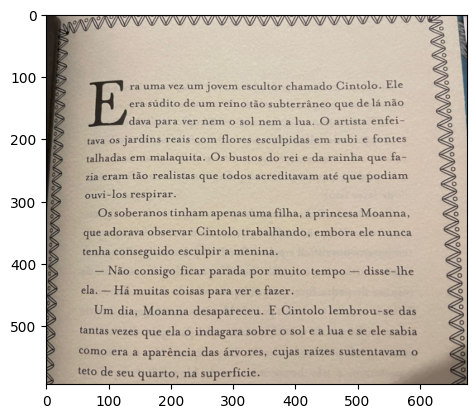

In [36]:
img = Image.open('/content/text-recognize/Imagens/Aula2-livro.png')
plt.imshow(img);

In [37]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 0.93
Script: Latin
Script confidence: 2.46



# Case 06 - Selecionando textos

Podemos testar também com um caso manuscrito. A imagem foi importada e convertida para RGB.

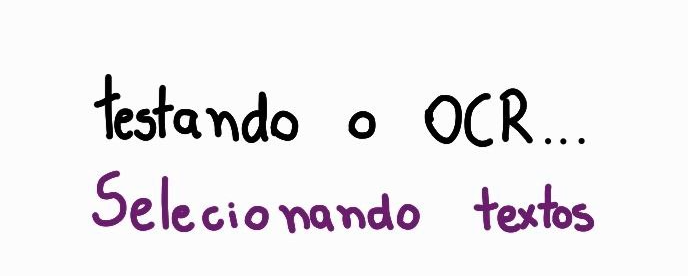

In [38]:
img = cv2.imread('/content/text-recognize/Imagens/Aula3-testando.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

Iremos importar o método Output do Pytesseract para que possamos obter informações detalhadas do reconhecimento da imagem.

In [39]:
from pytesseract import Output

In [40]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2],
 'left': [0, 92, 92, 94, 94, 348, 425, 92, 92, 474],
 'top': [0, 74, 74, 74, 74, 111, 88, 171, 171, 184],
 'width': [688, 502, 502, 491, 204, 28, 160, 502, 328, 120],
 'height': [276, 159, 159, 73, 69, 28, 59, 62, 62, 49],
 'conf': ['-1', '-1', '-1', '-1', 63, 90, 48, '-1', 85, 77],
 'text': ['',
  '',
  '',
  '',
  'Testando',
  'o',
  'OCR..',
  '',
  'Selecionando',
  'textos']}

Repare que o mais importante de tudo aqui é o termo ```conf``` - que diz respeito ao nível de confiança do algoritmo. No caso, quanto maior for, melhor. Quando for -1, não nenhuma confiança - de forma que o ```text``` será uma string vazia. Aonde for diferente de -1, teremos a leitura da palavra escrita.

Além disso, alguns parâmetros como a posição e espaço dessas leituras são obtidas a partir dos termos: ```left```, ```top```, ```width``` e ```height```. Com isso, podemos criar caixas de seleção, explicitando a região lida e o texto que foi reconhecido.

O primeiro passo é definir o nível mínimo de confiança que desejamos. Para isso, criaremos um slider (uma feature do Google Colab) - que permite uma edição mais interativa.

In [41]:
min_conf = 40 #@param {type: 'slider', min: 0, max: 100}

O próximo passo é criar o procedimento que desenhará a caixa de delimitadora. Para isso, usaremos o método ```rectangle``` do ```cv2```. Repare que o vértice é dado por ```left``` e ```top```, enquanto ```width``` e ```height``` denotam a região como um todo.

Outro fator importante é que cada item na lista é na verdade uma caixa delimitadora. Ou seja, para esboçar todas elas, devemos percorrer todos os índices da lista.

Outra parte importante é escrever a leitura na imagem. Para tal, iremos utilizar o método ```cv2.putText()``` exibindo o termo ```text``` dos nossos dados.

In [121]:
def bounding_box(img,color=(255,100,0)):

  for i in range(len(resultado['text'])):

    confianca = int(resultado['conf'][i])

    if confianca > min_conf:

      x = resultado['left'][i]
      y = resultado['top'][i]
      w = resultado['width'][i]
      h = resultado['height'][i]

      cv2.rectangle(img, (x,y), (x+w,y+h), color, 2)

      text = resultado['text'][i]
      cv2.putText(img, text, (x,y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color)

Agora, para utilizar a função que gerará as caixas delimitadoras e escreverá o que foi reconhecido - ```bounding_box``` - faremos uma cópia da imagem rgb (para resguardar a imagem original). Em seguida, após a aplicação da função, exibiremos o resultado.

**OBS.:** repare que ```color=(255,100,0)``` trata-se de um valor padrão, ou seja, que será adotado caso nenhum outro for informado.

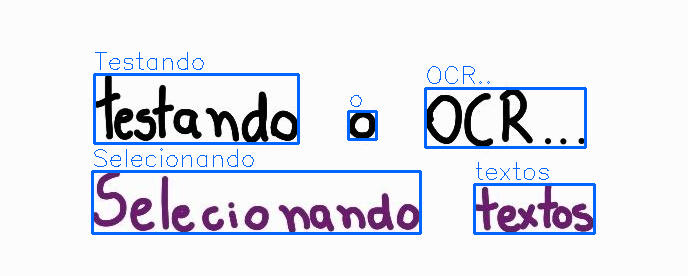

In [43]:
img_copia = rgb.copy()
bounding_box(img_copia)
cv2_imshow(img_copia)

Podemos ainda salvar o nosso resultado. Com todas essas detecções e caixas delimitadoras que criamos.

Primeiramente, vamos criar uma pasta dentro dos arquivos do Colab.

In [44]:
import os
os.makedirs('images_tesseract', exist_ok=True)

Esse comando garantirá que o diretório não seja criado várias vezes.

Agora, para, de fato, salvar a imagem:

In [45]:
cv2.imwrite('/content/images_tesseract/manuscrito.png', img_copia)

True

# Case 07 - Expressões Regulares

A biblioteca utilizada para identificação de expressões regulares é a chamada RE (de Regular Expressions). O primeiro passo é importá-la em nosso ambiente.

In [46]:
import re

A próxima etapa é importarmos a imagem com fizemos até o momento.

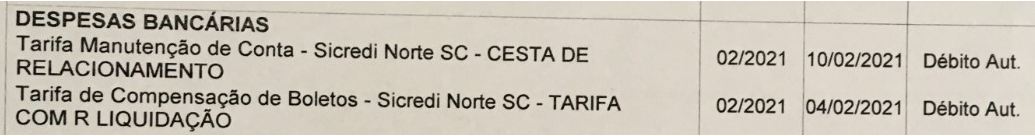

In [97]:
img = cv2.imread('/content/text-recognize/Imagens/Aula4-tabela_teste.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [98]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)

Usando o esquema de caixas delimitadores do caso anterior:

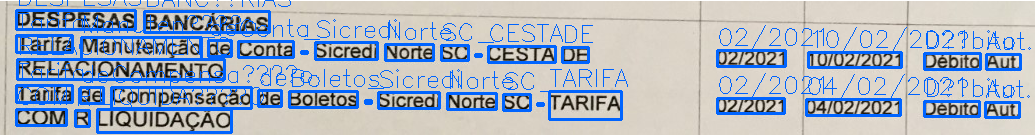

In [101]:
img_copia = rgb.copy()
bounding_box(img_copia)
cv2_imshow(img_copia)

Agora, queremos identificar somente as datas, para isso, definiremos o padrão de uma data.

In [102]:
padrao_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

Para adequarmos nossas caixas delimitadoras ao nosso padrão de reconhecimento, deveremos fazer algumas alterações no procedimento ```bounding_box()```. Basta informar o padrão e verificar o ```match``` com a biblioteca ```re```.

In [126]:
def bounding_box_re(img,data_pattern,color=(255,100,0)):

  for i in range(len(resultado['text'])):

    confianca = int(resultado['conf'][i])
    read = resultado['text'][i]

    if confianca > min_conf and re.match(padrao_data, read):

      x = resultado['left'][i]
      y = resultado['top'][i]
      w = resultado['width'][i]
      h = resultado['height'][i]

      cv2.rectangle(img, (x,y), (x+w,y+h), color, 2)

      text = resultado['text'][i]
      cv2.putText(img, text, (x,y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color)

Após a seleção do padrão, podemos rodar novamente o procedimento.

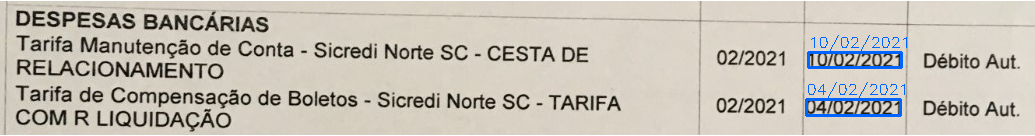

In [103]:
img_copia = rgb.copy()
bounding_box_re(img_copia,padrao_data)
cv2_imshow(img_copia)

# Case 08 - Cenários naturais

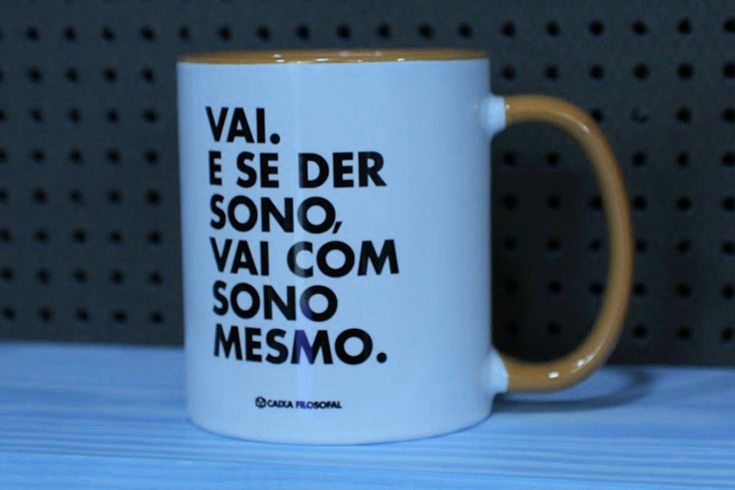

In [106]:
img = cv2.imread('/content/text-recognize/Imagens/Aula4-caneca2.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [107]:
config_tesseract = '--tessdata-dir tessdata --psm 6'

In [93]:
min_conf = 40 #@param {type: 'slider', min: 0, max: 100}

In [114]:
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)

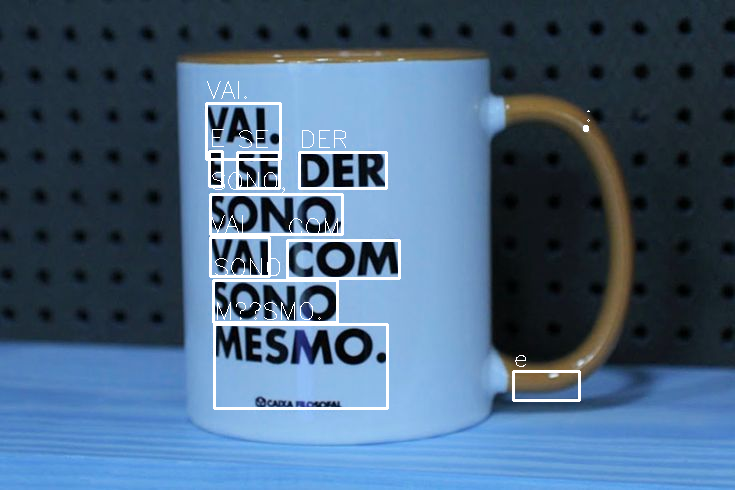

In [128]:
img_copia = rgb.copy()
bounding_box(img_copia,(255,255,255))
cv2_imshow(img_copia)

Tivemos dois problemas aqui, o primeiro foi em relação à escrita do OpenCV (```cv2.putText()```) - pois, o Tesseract identifica "MÉSMO" e é escrito na imagem: "M??SMO". O segundo problema se dá pela identificação de falsos positivos, como o caractere 'e' e ':' que não deveriam existir, mas, por conta do cenário natural - considerando sombras e iluminação - acabam sendo identificados.

Semelhante aos modelos de machine learning convencionais temos as métricas que podem ser utilizadas após a montagem da matriz de confusão e nos auxiliam a entender melhor sobre como nosso modelo está performando.

Dentro da nossa matriz de confusão ainda continuamos com os mesmos campos, de verdadeiros e falsos que podem ser positivos ou negativos, gerando nossas quatro categorias:

- **Verdadeiro Positivo (VP)**: É quando o modelo categoriza corretamente uma imagem. Por exemplo, categorizar uma imagem de um gato como um gato.
- **Falso Positivo (FP)**: Quando o modelo categoriza uma imagem quando não deveria. Por exemplo, categorizar uma imagem de um gato como um cachorro.
- **Verdadeiro Negativo (VN)**: Ocasião na qual o modelo não categoriza corretamente uma imagem. Por exemplo, não categorizar uma imagem de um gato como um cachorro.
- **Falso Negativo (FN)**: É quando o modelo não categoriza uma imagem, mas deveria. Por exemplo, não categorizar uma imagem de um gato como gato.

Um destaque especial é dado para os valores de Falsos Positivos (FP) que ocorrem quando a imagem tem mais classificações do que deveria, apresentando caixas a mais em lugares onde o objeto ou o texto não se encontra, que foi o caso.

pós termos os valores de VP, FP, VN e FN podemos medir a performance do nosso modelo com algumas métricas, como a Acurácia, Precisão e Recall (ou Sensibilidade - em português).

Sendo assim, temos que cada um destes itens significam, respectivamente:

- **Acurácia**: avalia a proporção de acertos em relação a todas as previsões realizadas. É obtida pelo quociente da soma dos valores de verdadeiros positivos e negativos por todos os outros valores previstos (VP, VN, FP, FN).
- **Precisão**: avalia a proporção de verdadeiros positivos dentre as predições dadas como positivas pelo modelo. É obtida dividindo os verdadeiros positivos pela soma das previsões positivas.
- **Recall / Sensibilidade**: avalia a proporção de verdadeiros positivos dentre todos os valores positivos reais. É obtida dividindo os verdadeiros positivos pela soma de positivos reais.

Além disso, outras métricas, tais como Taxa de Verdadeiros Positivos (TVP) e a Taxa de Falsos Positivos (TFP) também podem ser calculadas com base nos valores obtidos da matriz de confusão. Com os valores de TVP e TFP é possível fazer o gráfico utilizado para avaliar modelos de classificação, chamado de curva ROC

**OBS.:** para um melhor reconhecimento e para eliminar os falsos positivos, precisariamos aplicar técnicas mais sofisticadas de pré-processamento na imagem - nesses casos de cenários naturais - que não será abordado nesse momento.

# Case 09 - Projeto Final

O primeiro passo, será reconhecer todos os arquivos de imagem.

In [130]:
project_path = '/content/text-recognize/Imagens/Projeto'
images_path = [os.path.join(project_path,f) for f in os.listdir(project_path)]

Criando um procedimento para exibir uma imagem.

In [131]:
def display_image(img):
    fig = plt.gcf()
    fig.set_size_inches(20,10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

Iterando as diferentes imagens e aplicando nosso procedimento para exibição.

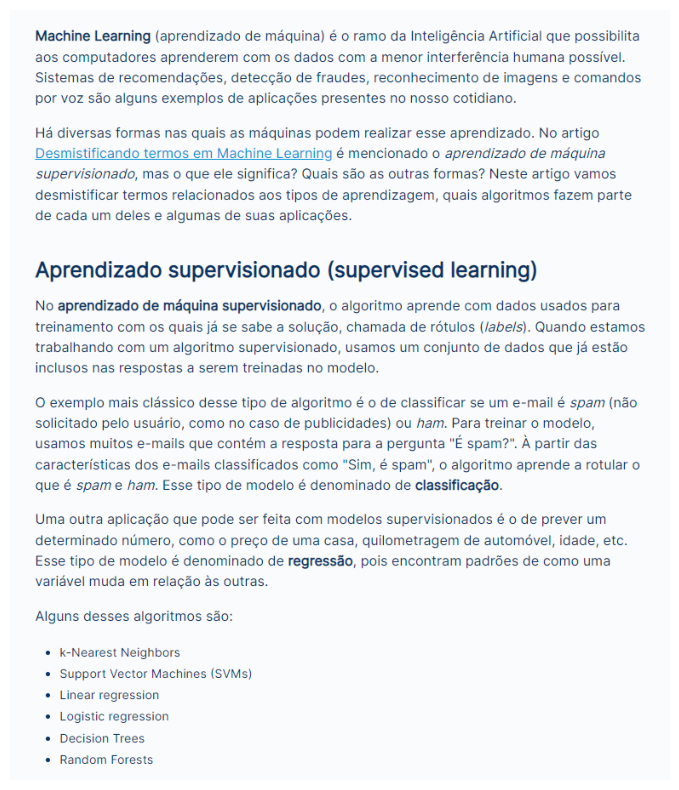

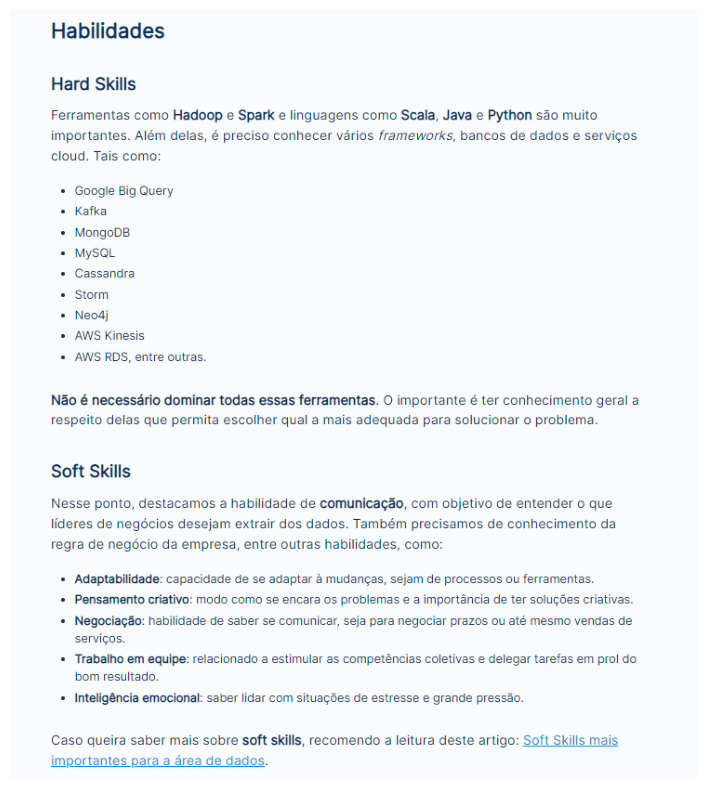

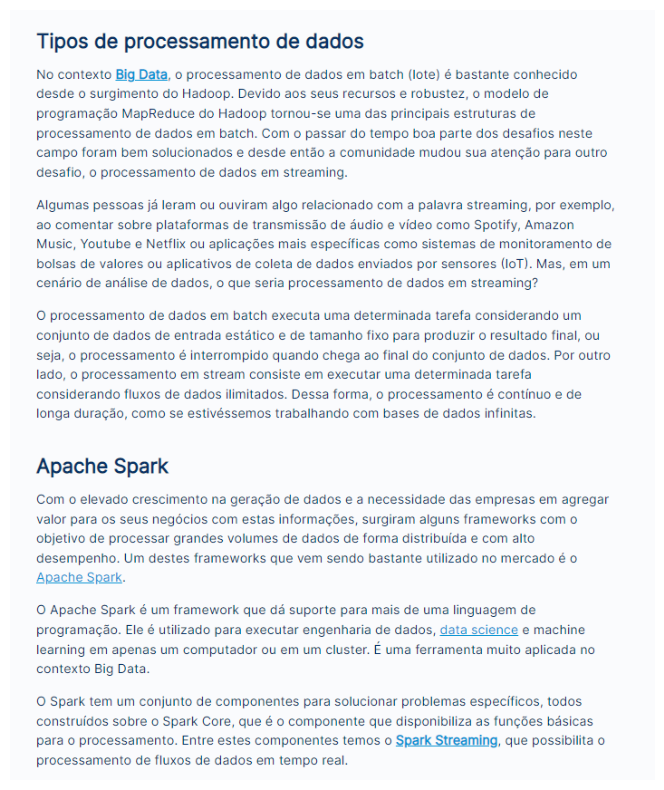

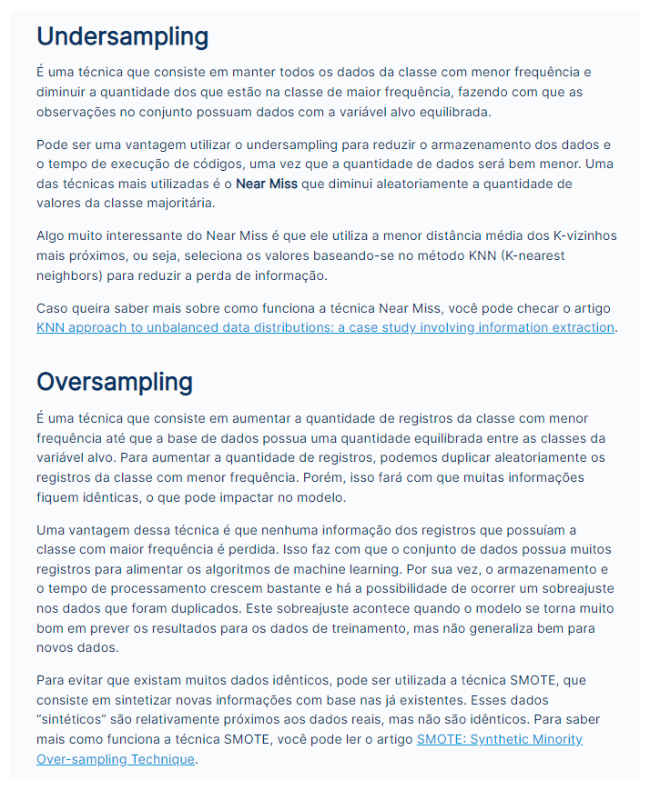

In [132]:
for image in images_path:
    image = cv2.imread(image)
    display_image(image)

Processando todas as imagens utilizando o Tesseract e concatenando todo o texto em uma única variável.

In [140]:
config_tesseract = '--tessdata-dir tessdata'

def OCR_process(img, config_tesseract):
  text = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
  return text

complete_text = ''
name_txt = 'resultados_ocr.txt'

for image in images_path:
  img = cv2.imread(image)
  name_image = os.path.split(image)[-1]
  name_division = '\n========================\n' + str(name_image) + '\n========================\n'
  complete_text = complete_text + name_division + '\n'
  text = OCR_process(img,config_tesseract)
  complete_text = complete_text + text

O texto obtido pode ser visto a seguir:

In [141]:
print(complete_text)


artigo-termos-ML.png

Machine Learning (aprendizado de máquina) é o ramo da Inteligência Artificial que possibilita
aos computadores aprenderem com os dados com a menor interferência humana possível.
Sistemas de recomendações, detecção de fraudes, reconhecimento de imagens e comandos
por voz são alguns exemplos de aplicações presentes no nosso cotidiano.

Há diversas formas nas quais as máquinas podem realizar esse aprendizado. No artigo
Desmistificando termos em Machine Learning é mencionado o aprendizado de máquina
supervisionado, mas o que ele significa? Quais são as outras formas? Neste artigo vamos
desmistificar termos relacionados aos tipos de aprendizagem, quais algoritmos fazem parte
de cada um deles e algumas de suas aplicações.

Aprendizado supervisionado (supervised learning)

No aprendizado de máquina supervisionado, o algoritmo aprende com dados usados para

treinamento com os quais já se sabe a solução, chamada de rótulos (/abels). Quando estamos
trabalhando com um algor

É importante que exportemos esse texto para que ele possa ser processado ou utilizado de outras formas. Como, por exemplo, poderíamos utilizar um algoritmo de processamento de linguagem natural (NLP).

In [142]:
file_txt = open(name_txt, 'w+')
file_txt.write(complete_text + '\n')
file_txt.close()